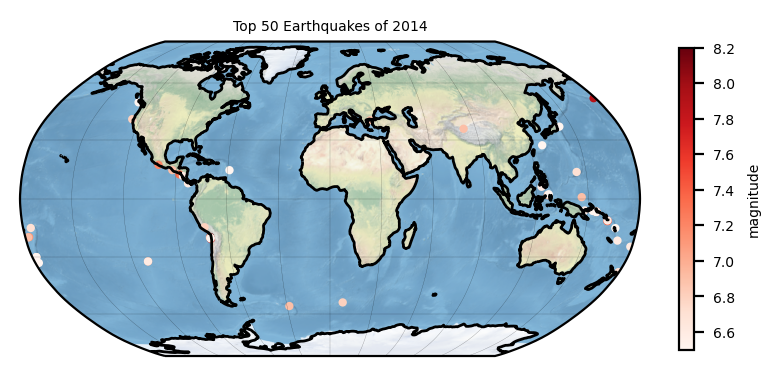

In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

fig = plt.figure(figsize=[5,5],dpi=200)
#ax = fig.add_axes([0,0,1,1],frameon=False);
# fig, ax = plt.subplots(figsize=(5,5), dpi=200)
ax = plt.axes(projection= ccrs.Robinson())

ax.stock_img()
ax.coastlines()
# # Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.1, color='black', alpha=0.5)

# # Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

data = pd.read_csv("usgs_earthquakes.csv");
data = data.sort_values(by = "mag",ascending = False)
top50 = data.head(50)

lats = list(top50["latitude"]);
lons = list(top50["longitude"]);
mag = list(top50['mag'])

magi = ax.scatter(lons, lats, c=mag,cmap='Reds',s = 4, transform = ccrs.PlateCarree())
cb = fig.colorbar(magi, ax= ax, shrink=0.4)
cb.ax.set_ylabel("magnitude",fontsize=5)
cb.ax.tick_params(labelsize=5)
plt.title('Top 50 Earthquakes of 2014',pad=4,size=5)  

plt.show()

In [2]:
import netCDF4
import xarray as xr
import numpy as np
import matplotlib.ticker as mticker
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.offsetbox import AnchoredText
%matplotlib inline
ds = xr.open_dataset("ERA5_LAND.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2021-04-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-11-27 16:27:37 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

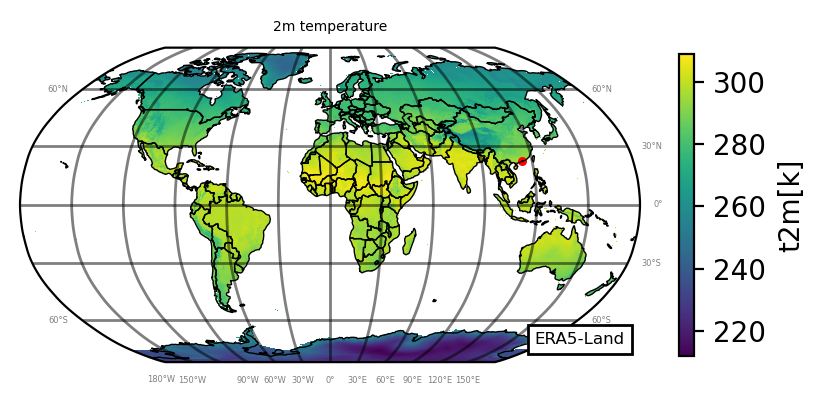

In [10]:
# 2m temperature
t2m = ds["t2m"]
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=200)

# Create an axes 
# ax = plt.axes(projection=ccrs.Robinson());
ax = plt.axes(projection=ccrs.Robinson())

result = t2m.plot(ax=ax, 
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={'shrink': 0.4,"label":"t2m[k]"})

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
# Add shenzhen point
ax.scatter(114.06, 22.54, color='red',s=5, transform=ccrs.PlateCarree())


# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, draw_labels=True)

# Add a text annotation for the license information to the
# the bottom right corner.
text = AnchoredText("ERA5-Land",
                    loc=4, prop={'size': 6}, frameon=True)
ax.add_artist(text)


# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
gl.top_labels = False
gl.left_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 3, 'color': 'gray'}
gl.ylabel_style = {'size': 3, 'color': 'gray'}

# Set title
ax.set_title("2m temperature",fontsize=5);

# Set label and ticks
plt.xlabel("longitude",fontsize = 5);
plt.ylabel("latitude",fontsize = 5);

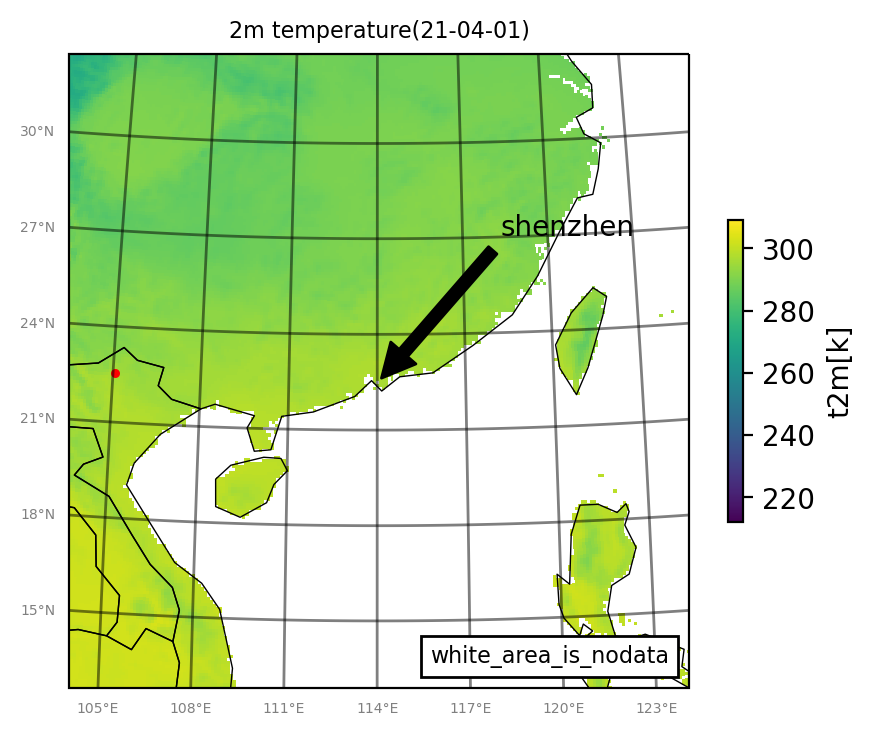

In [7]:
plt.figure(figsize=(5,5),dpi=200)
central_lon, central_lat = 114.06, 22.54
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)

extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)

result = t2m.plot(ax=ax, 
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={'shrink': 0.4,"label":"t2m[k]"})

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add a text annotation for the license information to the
# the bottom right corner.
text = AnchoredText("white_area_is_nodata",
                    loc='lower right', prop={'size': 8}, frameon=True)
ax.add_artist(text)

# Add shenzhen point
ax.scatter(114.06, 22.54, color='red', s=5, transform=ccrs.PlateCarree())
ax.annotate("shenzhen", xy=(114.06, 22.54),xytext=(0.5,0.5),
            textcoords='figure fraction',
            arrowprops=dict(facecolor = "black", shrink = 0.02))

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 5, 'color': 'gray'}
gl.ylabel_style = {'size': 5, 'color': 'gray'}

# Set title
ax.set_title("2m temperature(21-04-01)",fontsize=8);